# Rule-Based Classification for Calculating Potential Customer Return

<div style="font-family: 'Verdana', sans-serif; border: 2px solid #2d3436; border-radius: 10px; padding: 20px; margin: 20px 0; background-color: #f5f5f5; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1);">
    <h2 style="text-align: left; color: #2d3436; border-bottom: 2px solid #74b9ff; padding-bottom: 8px; margin-bottom: 16px;">
        Rule-Based Classification
    </h2>
    <p style="color: #333; line-height: 1.8; font-size: 1.1em; text-align: justify;">
        <strong>Rule-Based Classification</strong> is a method of categorizing data using predefined logical rules and conditions. 
        This approach stands as one of the most fundamental and comprehensible classification methods in the machine learning world.
    </p>
    <p style="color: #333; line-height: 1.8; font-size: 1.1em; text-align: justify;">
        The greatest advantage of this method lies in its transparency and understandability. Even individuals without data science 
        expertise can easily comprehend and modify the rules. However, when dealing with complex problems, the method might require 
        numerous rules, which can make management more challenging.
    </p>
</div>


<div style="font-family: 'Arial', sans-serif; border: 2px solid #0984e3; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #dfe6e9; box-shadow: 2px 4px 10px rgba(0, 0, 0, 0.1);">
    <h2 style="text-align: center; color: #2d3436; font-size: 1.6em; border-bottom: 2px solid #0984e3; padding-bottom: 10px; margin-bottom: 16px;">
        🛠️ The Business Problem
    </h2>
    <ul style="color: #2d3436; font-size: 1.1em; line-height: 1.8; list-style-type: disc; padding-left: 20px; text-align: justify;">
        <li>
            <strong>Create new sales definitions:</strong> Develop (level-based) sales definitions and create new segments based on these definitions.
        </li>
        <li>
            <strong>Segment Analysis:</strong> Establish new customer segments and analyze them to predict potential revenue.
        </li>
        <li>
            <strong>Revenue Prediction:</strong> Determine how much a company can earn on average from prospective customers.
        </li>
    </ul>
    <p style="color: #2d3436; font-size: 1.1em; line-height: 1.8; text-align: justify; margin-top: 16px;">
        For example, if a customer plans to visit an All-Inclusive hotel in Antalya during a busy season, the goal is to predict the 
        average revenue the company can generate from such a customer.
    </p>
</div>


<div style="font-family: 'Arial', sans-serif; border: 2px solid #00cec9; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #f0f9f9; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.1);">
    <h2 style="text-align: center; color: #2d3436; font-size: 1.6em; border-bottom: 2px solid #00cec9; padding-bottom: 10px; margin-bottom: 16px;">
        📊 The Data Set Story
    </h2>
    <p style="color: #34495e; font-size: 1.1em; line-height: 1.8; text-align: justify; margin-bottom: 20px;">
        The dataset provides information about sales transactions made by the Gezinomi company. It contains records of sales prices and various details about each transaction. This data can be used to analyze and predict revenue, customer behavior, and seasonal trends.
    </p>
    <h3 style="color: #2d3436; font-size: 1.3em; margin-bottom: 10px; border-bottom: 1px solid #00cec9; padding-bottom: 5px;">
        Key Features in the Dataset:
    </h3>
    <ul style="color: #34495e; font-size: 1.1em; line-height: 1.8; padding-left: 20px;">
        <li><strong>SaleId:</strong> Unique identifier for each sales transaction.</li>
        <li><strong>SaleDate:</strong> The date when the sale was made.</li>
        <li><strong>Price:</strong> The amount paid for the sale.</li>
        <li><strong>ConceptName:</strong> Information about the hotel concept.</li>
        <li><strong>SaleCityName:</strong> The city where the hotel is located.</li>
        <li><strong>CheckInDate:</strong> The date when the customer checked into the hotel.</li>
        <li><strong>CInDay:</strong> The day of the week of the customer's check-in.</li>
        <li><strong>SaleCheckInDayDiff:</strong> The number of days between the sale date and the check-in date.</li>
        <li><strong>Season:</strong> The season of the check-in date.</li>
    </ul>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Import Required Libraries</div></b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore")

<a id='Adjusting-Row-Column-Settings'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Adjusting Row Column Settings</div></b>

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Loading the Data Set</div></b>

In [3]:
df = pd.read_excel("/kaggle/input/gzmn01/gezinomi.xlsx")

In [4]:
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Exploratory Data Analysis</div></b>

In [5]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df)

##################### Shape #####################
(59164, 9)
##################### Types #####################
SaleId                         int64
SaleDate              datetime64[ns]
CheckInDate           datetime64[ns]
Price                        float64
ConceptName                   object
SaleCityName                  object
CInDay                        object
SaleCheckInDayDiff             int64
Seasons                       object
dtype: object
##################### Head #####################
   SaleId   SaleDate CheckInDate  Price     ConceptName SaleCityName  \
0  415122 2022-12-03  2022-12-03  79.30    Herşey Dahil      Antalya   
1  415103 2022-12-03  2022-12-03  45.97  Yarım Pansiyon      Antalya   
2  404034 2022-09-12  2022-09-13  77.84    Herşey Dahil      Antalya   
3  415094 2022-12-03  2022-12-10 222.71  Yarım Pansiyon        İzmir   
4  414951 2022-12-01  2022-12-03 140.48  Yarım Pansiyon        İzmir   

     CInDay  SaleCheckInDayDiff Seasons  
0  Saturday       

In [7]:
# To drop the "SaleId" variable from the dataset
df = df.drop("SaleId", axis=1)

In [8]:
df.head()

,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low
1,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low
2,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High
3,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low
4,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low


In [9]:
# To split the "SaleDate" variable into separate year, month, and day variables
df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month
df['SaleDay'] = df['SaleDate'].dt.day

In [10]:
df.head()

,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay
0,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3
1,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3
2,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12
3,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3
4,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1


In [11]:
# To drop the "SaleDate" variable from the dataset
df = df.drop("SaleDate", axis=1)

In [12]:
df.head()

,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay
0,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3
1,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3
2,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12
3,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3
4,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1


In [13]:
# Filling the empty observations of the Price variable with the mean.
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [14]:
df.head()

,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay
0,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3
1,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3
2,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12
3,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3
4,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Capturing / Detecting Numeric and Categorical Variables</div></b>

In [15]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.
    Parameters
    ------
         dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [16]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 59164
Variables: 10
cat_cols: 5
num_cols: 5
cat_but_car: 0
num_but_cat: 1


In [17]:
cat_cols

['ConceptName', 'SaleCityName', 'CInDay', 'Seasons', 'SaleYear']

In [18]:
num_cols

['CheckInDate', 'Price', 'SaleCheckInDayDiff', 'SaleMonth', 'SaleDay']

In [19]:
cat_but_car

[]

In [20]:
num_but_cat

['SaleYear']

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Categorical Variable Analysis</div></b>

                ConceptName  Ratio
Herşey Dahil          53186  89.90
Yarım Pansiyon         3559   6.02
Oda + Kahvaltı         2419   4.09
##########################################


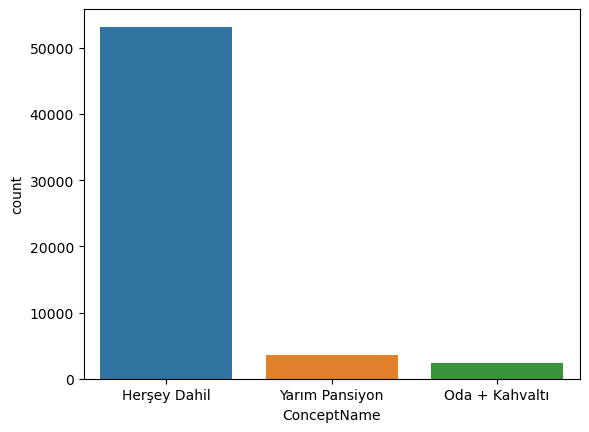

         SaleCityName  Ratio
Antalya         31649  53.49
Muğla           10662  18.02
Aydın           10646  17.99
Diğer            3245   5.48
İzmir            2507   4.24
Girne             455   0.77
##########################################


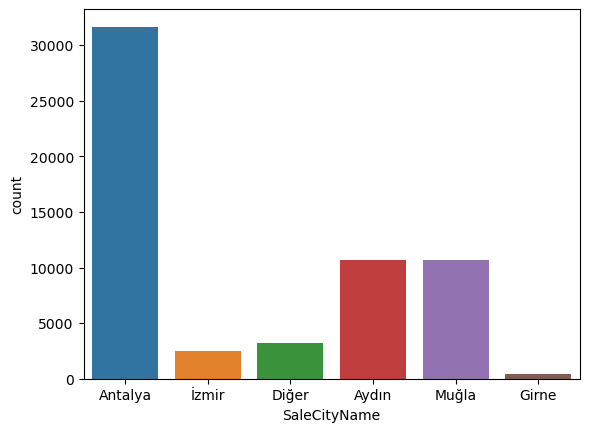

           CInDay  Ratio
Monday      12794  21.62
Saturday     9967  16.85
Friday       8683  14.68
Thursday     7314  12.36
Sunday       7050  11.92
Tuesday      6807  11.51
Wednesday    6549  11.07
##########################################


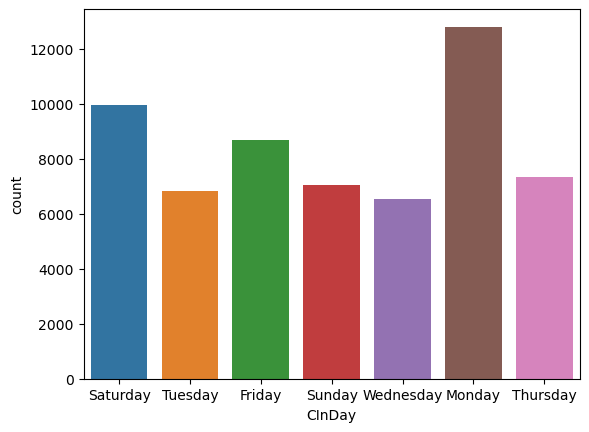

      Seasons  Ratio
High    50946  86.11
Low      8218  13.89
##########################################


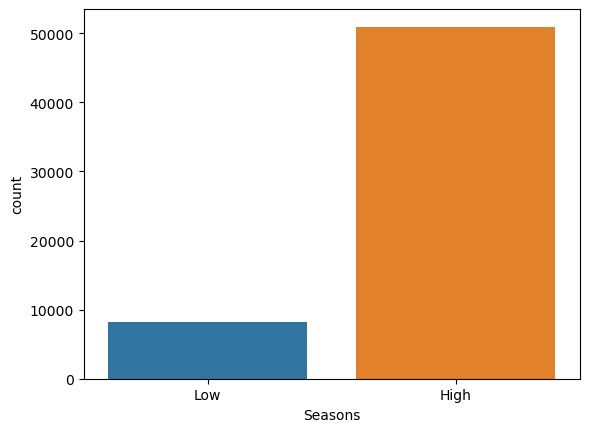

      SaleYear  Ratio
2022     22536  38.09
2021     19159  32.38
2020      6992  11.82
2016      2892   4.89
2018      2723   4.60
2017      2656   4.49
2019      2206   3.73
##########################################


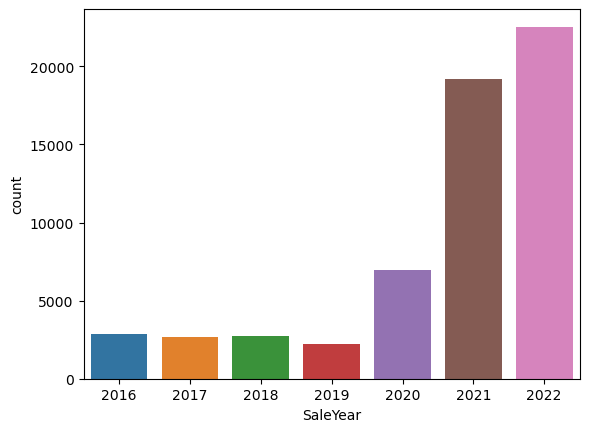

In [21]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Numerical Variable Analysis</div></b>

count                   59164
unique                   2173
top       2022-08-22 00:00:00
freq                      405
first     2007-07-20 00:00:00
last      2023-08-16 00:00:00
Name: CheckInDate, dtype: object


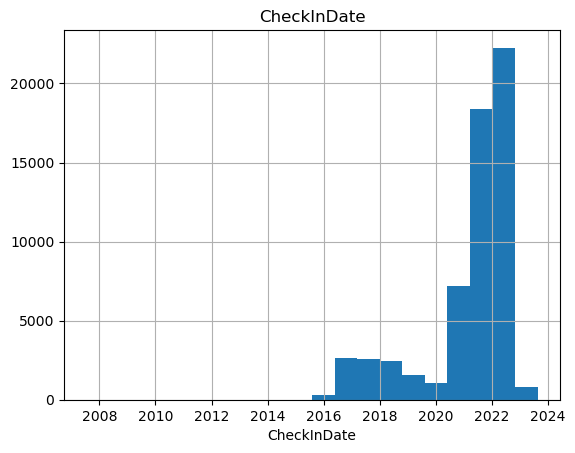

count   59164.00
mean       61.35
std        51.38
min         0.00
5%         19.64
10%        24.46
20%        31.80
30%        39.17
40%        46.36
50%        54.27
60%        61.86
70%        72.21
80%        84.85
90%       106.29
95%       125.45
99%       172.74
max      4880.47
Name: Price, dtype: float64


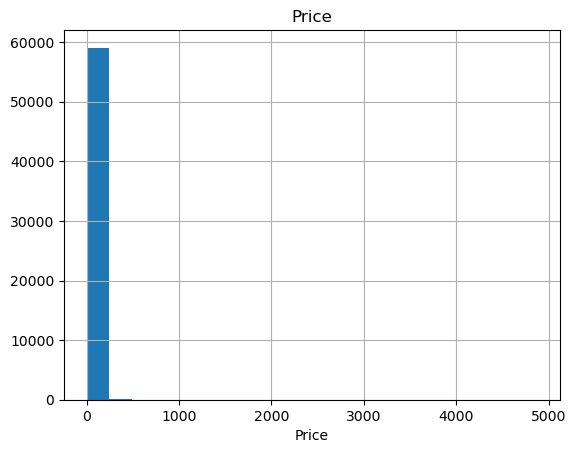

count   59164.00
mean       31.84
std        51.49
min         0.00
5%          0.00
10%         1.00
20%         2.00
30%         3.00
40%         6.00
50%        10.00
60%        16.00
70%        26.00
80%        46.00
90%       103.00
95%       157.00
99%       223.00
max       630.00
Name: SaleCheckInDayDiff, dtype: float64


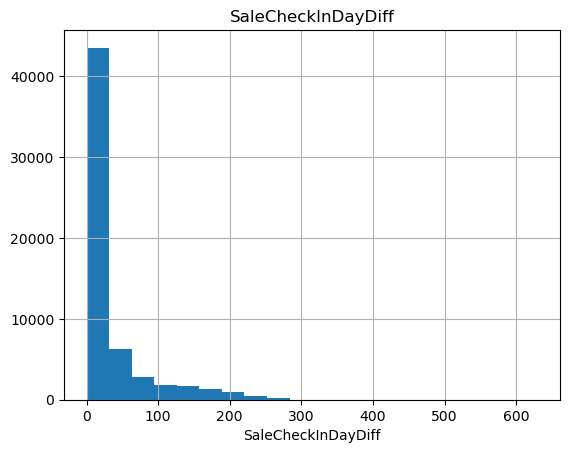

count   59164.00
mean        6.41
std         2.44
min         1.00
5%          2.00
10%         3.00
20%         4.00
30%         5.00
40%         6.00
50%         7.00
60%         7.00
70%         8.00
80%         8.00
90%         9.00
95%        10.00
99%        12.00
max        12.00
Name: SaleMonth, dtype: float64


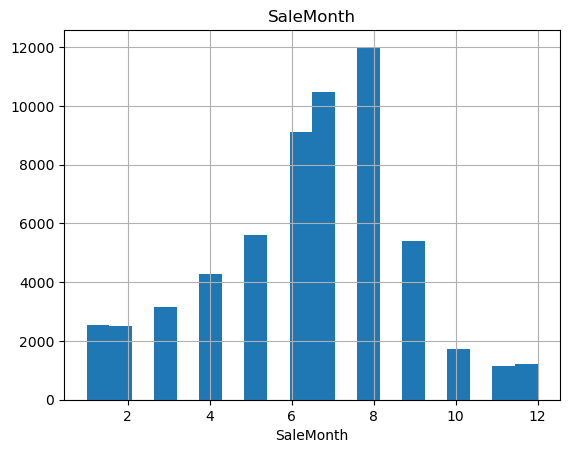

count   59164.00
mean       15.88
std         8.82
min         1.00
5%          2.00
10%         4.00
20%         7.00
30%        10.00
40%        13.00
50%        16.00
60%        19.00
70%        22.00
80%        25.00
90%        28.00
95%        30.00
99%        31.00
max        31.00
Name: SaleDay, dtype: float64


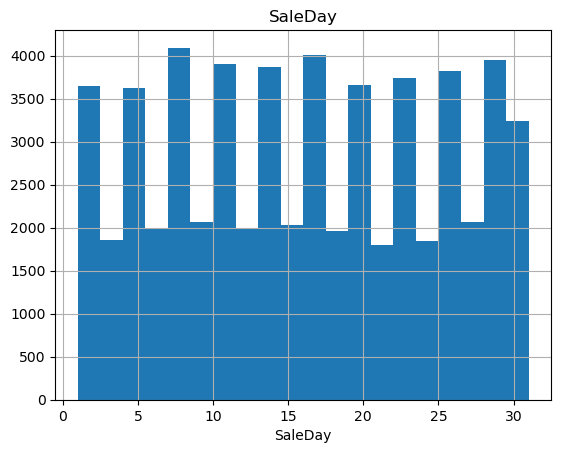

In [22]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Analysis of Categorical Variables by Target Variable</div></b>

                TARGET_MEAN
ConceptName                
Herşey Dahil          62.67
Oda + Kahvaltı        50.27
Yarım Pansiyon        49.04




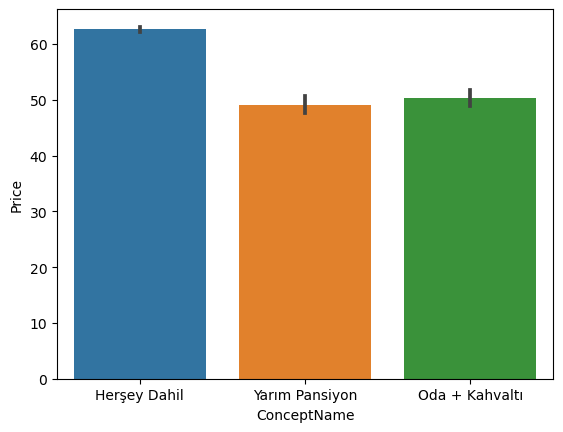

              TARGET_MEAN
SaleCityName             
Antalya             64.52
Aydın               53.86
Diğer               47.73
Girne               59.48
Muğla               62.46
İzmir               66.26




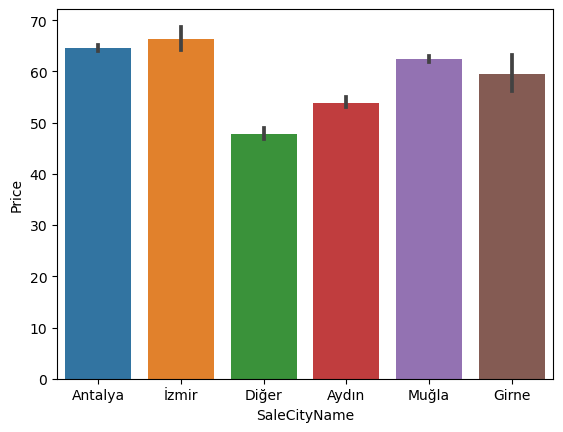

           TARGET_MEAN
CInDay                
Friday           58.76
Monday           61.23
Saturday         60.42
Sunday           62.97
Thursday         60.57
Tuesday          63.45
Wednesday        63.34




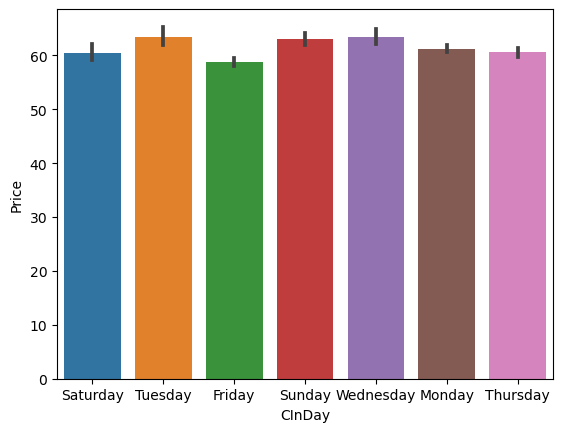

         TARGET_MEAN
Seasons             
High           62.48
Low            54.29




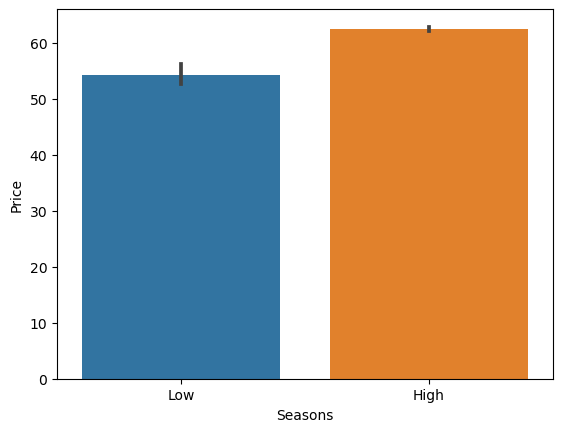

          TARGET_MEAN
SaleYear             
2016            71.35
2017            67.33
2018            61.06
2019            76.40
2020            52.65
2021            60.56
2022            61.28




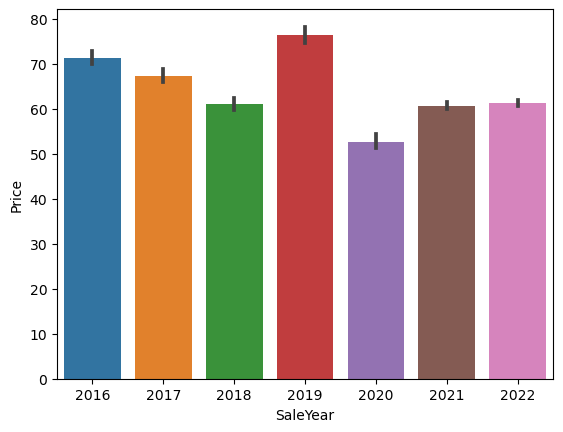

In [23]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    target_summary_with_cat(df, 'Price', col, plot=True)

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Correlation Analysis of the Variables</div></b>

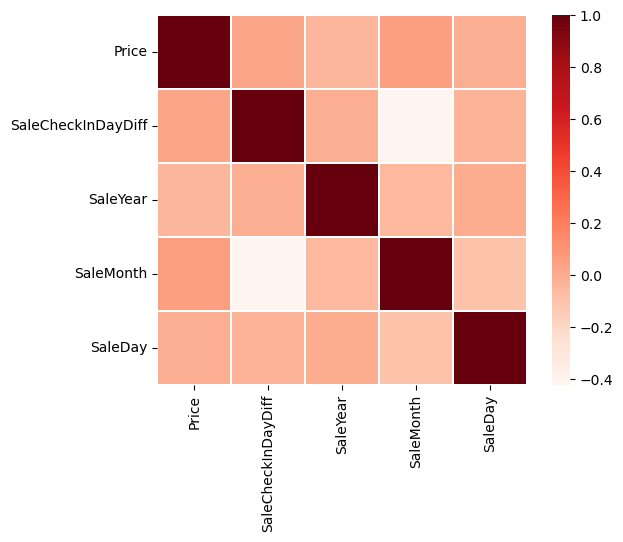

SaleCheckInDayDiff  SaleMonth            0.42
SaleMonth           SaleDay              0.10
SaleYear            SaleMonth            0.06
Price               SaleMonth            0.06
                    SaleYear             0.04
SaleCheckInDayDiff  SaleDay              0.03
Price               SaleCheckInDayDiff   0.02
SaleCheckInDayDiff  SaleYear             0.01
Price               SaleDay              0.01
SaleYear            SaleDay              0.00
dtype: float64

In [24]:
def df_corr(dataframe, annot=True):
    sns.heatmap(dataframe.corr(), annot=annot, linewidths=.2, cmap='Reds', square=True)
    plt.show(block=True)

def high_correlated_cols(dataframe,head=10):
    corr_matrix = dataframe.corr().abs()
    corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                                   .astype(bool)).stack().sort_values(ascending=False)).head(head)
    return corr_cols

df_corr(df, annot=False)
high_correlated_cols(df, 15)

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Distribution of the Dependent Variable</div></b>

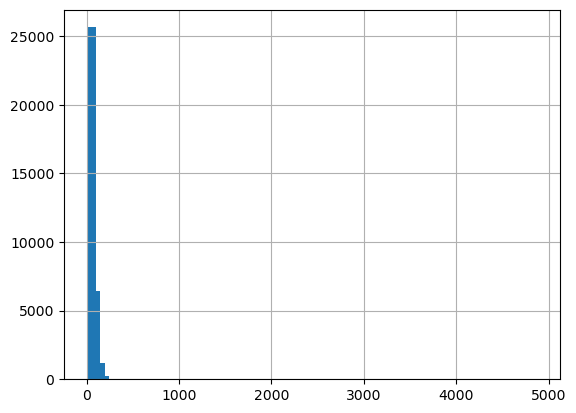

In [25]:
df["Price"].hist(bins=100)
plt.show(block=True)

<div style="background-color: #003366; padding: 20px; border-radius: 8px; margin: 20px 0;">
    <h1 style="color: white; text-align: center; font-size: 24px; margin-bottom: 15px;">
        Implementation of Rule Based Classification
    </h1>
    <p style="color: #e6e6e6; text-align: justify; font-size: 16px; line-height: 1.6;">
        After conducting comprehensive exploratory data analysis and understanding the relationships between variables through correlation analysis, we will now proceed to develop our rule-based classification system. This system will help us categorize potential customer value based on various features such as booking patterns, seasonal preferences, and price sensitivity. The following sections will detail the step-by-step implementation of our classification rules and their business implications.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>City-Based Revenue Analysis</div></b>

In [26]:
df.groupby("SaleCityName").agg({"Price": "sum"})

,Price
SaleCityName,
Antalya,2042033.79
Aydın,573357.35
Diğer,154879.02
Girne,27065.03
Muğla,665964.90
İzmir,166118.87


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are examining the <b>total sales volume by city</b>. 
        We aim to understand the <b>total financial volume</b> generated by each city.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Analysis of Total Revenue Distribution Across Cities</div></b>

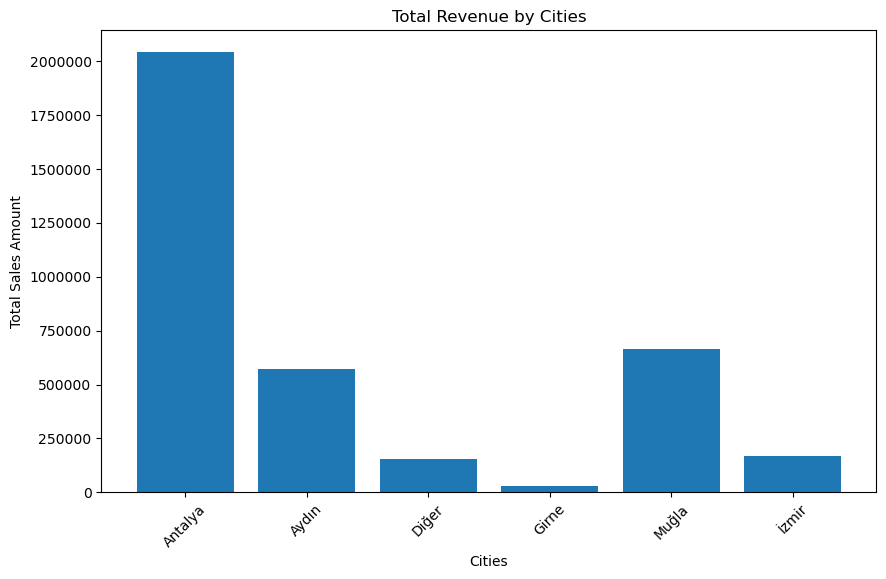

In [27]:
sales_by_city = df.groupby("SaleCityName")["Price"].sum()

# Setting the x and y axes for the graph
x = sales_by_city.index
y = sales_by_city.values

# Setting the size of the graph
plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(x, y)

# Adding axis labels and a title to the graph
plt.xlabel("Cities")
plt.ylabel("Total Sales Amount")
plt.title("Total Revenue by Cities")

# Rotating the axis labels
plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='y')

# Displaying the graph
plt.show()

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this visualization, we are creating a bar chart to compare <b>total sales revenue</b> across different cities. 
        We aim to represent the <b>city-wise financial performance</b> through a clear visual representation, making it easier to identify which cities are generating higher revenue.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Average Price Analysis by City</div></b>

In [28]:
df.groupby(by=["SaleCityName"]).agg({"Price": "mean"})

,Price
SaleCityName,
Antalya,64.52
Aydın,53.86
Diğer,47.73
Girne,59.48
Muğla,62.46
İzmir,66.26


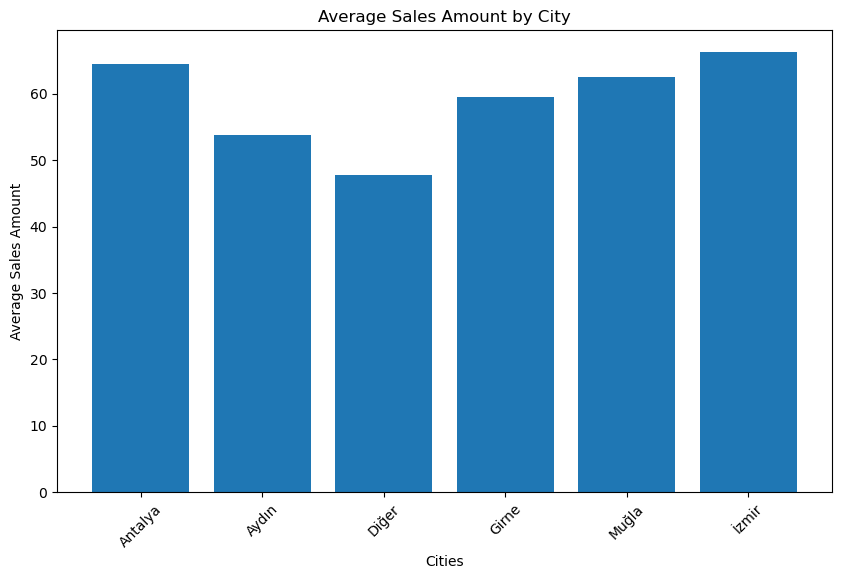

In [29]:
mean_sales_by_city = df.groupby("SaleCityName")["Price"].mean()

# Setting up the x and y axes for the plot
x = mean_sales_by_city.index
y = mean_sales_by_city.values

# Adjusting the size of the plot
plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(x, y)

# Adding axis labels and a title to the plot
plt.xlabel("Cities")
plt.ylabel("Average Sales Amount")
plt.title("Average Sales Amount by City")

# Rotating the axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()



<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are calculating the <b>average price</b> for each city in our dataset. 
        We aim to understand the <b>typical pricing levels</b> across different cities to identify which destinations tend to have higher or lower average prices.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Revenue Analysis by Hotel Concept</div></b>

In [30]:
df.groupby("ConceptName").agg({"Price": "sum"})

,Price
ConceptName,
Herşey Dahil,3333278.84
Oda + Kahvaltı,121615.08
Yarım Pansiyon,174525.04


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are examining the <b>total revenue</b> generated by each accommodation concept type (like all-inclusive, half-board, etc.). 
        We aim to understand which <b>concept types</b> are bringing in the most revenue to help identify the most profitable accommodation formats.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Advanced Price Analysis</div></b>

In [31]:
mean_price_by_city_concept = df.groupby(["SaleCityName", "ConceptName"]).agg({"Price": "mean"}).reset_index()

# Creating the plot
fig = px.bar(mean_price_by_city_concept, x="SaleCityName", y="Price", color="ConceptName",
             title="Average PRICE by City-Concept")

# Setting the axis labels
fig.update_layout(xaxis_title="City", yaxis_title="Average PRICE")

# Displaying the plot
fig.show(block=True)

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this visualization, we are creating an <b>advanced bar chart</b> that shows the <b>average price breakdown</b> by both city and concept type simultaneously. 
        We aim to understand how <b>prices vary</b> across different cities for each accommodation concept, allowing us to identify specific city-concept combinations that command higher or lower prices.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Early Booking (EB) Score Classification System</div></b>

In [32]:
bins = [-1, 7, 30, 90, df["SaleCheckInDayDiff"].max()]  
labels = ["Last Minutes", "Potential Planners", "Planners", "Early Bookers"]  
df["EB_Score"] = pd.cut(df["SaleCheckInDayDiff"], bins, labels=labels)  

In [33]:
df.head()

,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleYear,SaleMonth,SaleDay,EB_Score
0,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,2022,12,3,Last Minutes
1,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,2022,12,3,Last Minutes
2,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,2022,9,12,Last Minutes
3,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,2022,12,3,Last Minutes
4,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,2022,12,1,Last Minutes


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are creating a new categorical variable called <b>"EB_Score"</b> that segments our customers based on how far in advance they book their accommodations. 
        By dividing the booking time differences into four meaningful categories (<b>Last Minutes, Potential Planners, Planners, and Early Bookers</b>), we aim to understand the <b>booking behavior patterns</b> of our customers and identify different types of planners in our customer base.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Average salaries by City-Concept-EB Score</div></b>

In [34]:
df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg({"Price": ["mean", "count"]})

Price       
                                                 mean  count
SaleCityName ConceptName    EB_Score                        
Antalya      Herşey Dahil   Last Minutes        62.75  14148
                            Potential Planners  64.90   8876
                            Planners            67.88   4490
                            Early Bookers       66.49   3281
             Oda + Kahvaltı Last Minutes        65.35    503
                            Potential Planners  57.74     75
                            Planners            39.85     15
                            Early Bookers       35.00      5
             Yarım Pansiyon Last Minutes        70.43    204
                            Potential Planners  55.64     39
                            Planners            58.03      9
                            Early Bookers       35.03      4
Aydın        Herşey Dahil   Last Minutes        51.71   3966
                            Potential Planners  52.09   2717
                            Planners            57.88   1834
                            Early Bookers       57.44   2060
             Oda + Kahvaltı Last Minutes        37.80     20
                            Potential Planners  31.08     15
                            Planners            30.20      2
                            Early Bookers       26.81      1
             Yarım Pansiyon Last Minutes        30.87     18
                            Potential Planners  23.73      6
                            Planners            28.81      6
                            Early Bookers       59.60      1
Diğer        Herşey Dahil   Last Minutes        75.47    155
                            Potential Planners  85.79    129
                            Planners            87.26    120
                            Early Bookers       94.46    102
             Oda + Kahvaltı Last Minutes        38.24    542
                            Potential Planners  34.98    176
                            Planners            43.96     35
                            Early Bookers       35.72      8
             Yarım Pansiyon Last Minutes        39.47   1173
                            Potential Planners  45.70    605
                            Planners            46.14    173
                            Early Bookers       50.68     27
Girne        Herşey Dahil   Last Minutes        93.25     24
                            Potential Planners  94.95     41
                            Planners           103.41     25
                            Early Bookers      102.38     16
             Oda + Kahvaltı Last Minutes        37.58     62
                            Potential Planners  39.77     39
                            Planners            43.15     28
                            Early Bookers       43.97     10
             Yarım Pansiyon Last Minutes        60.86     73
                            Potential Planners  53.40     81
                            Planners            45.99     43
                            Early Bookers       33.60     13
Muğla        Herşey Dahil   Last Minutes        63.69   3851
                            Potential Planners  62.41   2943
                            Planners            63.44   1959
                            Early Bookers       61.52   1067
             Oda + Kahvaltı Last Minutes        51.09    331
                            Potential Planners  63.11    149
                            Planners            72.30    122
                            Early Bookers       66.76     53
             Yarım Pansiyon Last Minutes        41.88    104
                            Potential Planners  45.29     50
                            Planners            52.80     24
                            Early Bookers       61.14      9
İzmir        Herşey Dahil   Last Minutes        73.23    590
                            Potential Planners  67.77    440
                            Planners            80.04    231
                      

In [35]:
mean_count_price_by_city_concept_eb = df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg({"Price": ["mean", "count"]}).reset_index()
mean_count_price_by_city_concept_eb.columns = ["SaleCityName", "ConceptName", "EB_Score", "Mean_Price", "Count"]

# Graph creation
fig = px.bar(mean_count_price_by_city_concept_eb, x="SaleCityName", y="Mean_Price", color="EB_Score",
             facet_col="ConceptName",
             title="Average Prices by City-Concept-EB Score",
             labels={"EB_Score": "EB Score", "Mean_Price": "Average Price"},
             hover_data=["Count"])

# Updating axis labels
fig.update_layout(xaxis_title="SaleCityName", yaxis_title="Average Price")

# Showing the graph
fig.show()


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>multi-dimensional analysis</b>, we are examining the <b>average prices</b> and <b>number of bookings</b> across three key factors: cities, accommodation concepts, and booking behavior (<b>EB_Score</b>). 
        We aim to understand how these factors interact and affect both <b>pricing</b> and <b>booking volumes</b>, which helps us identify popular combinations and their associated pricing patterns.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Average Prices by City-Concept-Season</div></b>

In [36]:
df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean", "count"]})

Price       
                                      mean  count
SaleCityName ConceptName    Seasons              
Antalya      Herşey Dahil   High     64.92  27126
                            Low      61.55   3669
             Oda + Kahvaltı High     66.27    303
                            Low      60.67    295
             Yarım Pansiyon High     73.26    118
                            Low      62.00    138
Aydın        Herşey Dahil   High     54.95  10104
                            Low      33.68    473
             Oda + Kahvaltı High     30.39     27
                            Low      44.45     11
             Yarım Pansiyon High     32.63     20
                            Low      25.27     11
Diğer        Herşey Dahil   High     83.73    365
                            Low      87.31    141
             Oda + Kahvaltı High     35.07    352
                            Low      40.01    409
             Yarım Pansiyon High     39.73    516
                            Low      42.95   1462
Girne        Herşey Dahil   High    103.94     55
                            Low      90.94     51
             Oda + Kahvaltı High     39.48     66
                            Low      40.04     73
             Yarım Pansiyon High     58.38    100
                            Low      48.58    110
Muğla        Herşey Dahil   High     63.38   9583
                            Low      48.30    237
             Oda + Kahvaltı High     61.26    593
                            Low      37.77     62
             Yarım Pansiyon High     45.82    177
                            Low      32.68     10
İzmir        Herşey Dahil   High     74.74   1235
                            Low      74.31    147
             Oda + Kahvaltı High     54.14     86
                            Low      33.56    142
             Yarım Pansiyon High     87.22    120
                            Low      55.35    777

In [37]:
mean_count_price_by_city_concept_seasons = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean", "count"]}).reset_index()
mean_count_price_by_city_concept_seasons.columns = ["SaleCityName", "ConceptName", "Seasons", "Mean_Price", "Count"]

# Creating the plot
fig = px.bar(mean_count_price_by_city_concept_seasons, x="SaleCityName", y="Mean_Price", color="Seasons",
             facet_col="ConceptName",
             title="Average Prices by City-Concept-Season",
             labels={"Seasons": "Season", "Mean_Price": "Average Price"},
             hover_data=["Count"])

# Updating axis labels
fig.update_layout(xaxis_title="SaleCityName", yaxis_title="Average Price")

# Showing the plot
fig.show()


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>multi-dimensional analysis</b>, we are examining the <b>average prices</b> and <b>number of bookings</b> based on a different combination of factors: <b>cities</b>, <b>accommodation concepts</b>, and <b>seasonality</b>. 
        We aim to understand how these three key variables interact to influence both <b>pricing</b> and <b>booking volumes</b>, revealing patterns like which city-concept combinations are most popular in different seasons and their corresponding price points.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Average Prices by City-Concept-CInDay</div></b>

In [38]:
df.groupby(["SaleCityName", "ConceptName", "CInDay"]).agg({"Price": ["mean", "count"]})

Price      
                                        mean count
SaleCityName ConceptName    CInDay                
Antalya      Herşey Dahil   Friday     62.66  4138
                            Monday     63.26  6831
                            Saturday   64.42  4741
                            Sunday     65.85  3818
                            Thursday   62.89  3898
                            Tuesday    66.77  3760
                            Wednesday  67.17  3609
             Oda + Kahvaltı Friday     63.13   114
                            Monday     57.17    66
                            Saturday   58.01   117
                            Sunday     63.47    46
                            Thursday   64.65    93
                            Tuesday    65.84    73
                            Wednesday  72.81    89
             Yarım Pansiyon Friday     69.26    38
                            Monday     76.95    20
                            Saturday   63.38    71
                            Sunday     64.45    30
                            Thursday   66.64    40
                            Tuesday    71.02    21
                            Wednesday  67.78    36
Aydın        Herşey Dahil   Friday     51.04  1826
                            Monday     54.38  2566
                            Saturday   56.89  1702
                            Sunday     53.19  1098
                            Thursday   54.51  1315
                            Tuesday    53.51  1098
                            Wednesday  54.22   972
             Oda + Kahvaltı Friday     31.17     7
                            Monday     45.40     7
                            Saturday   23.93     2
                            Sunday     43.53     3
                            Thursday   37.52     7
                            Tuesday    32.93     3
                            Wednesday  25.95     9
             Yarım Pansiyon Friday     24.52     5
                            Monday     43.43     3
                            Saturday   29.70     8
                            Sunday     30.28     3
                            Thursday   22.78     5
                            Tuesday    32.16     4
                            Wednesday  35.55     3
Diğer        Herşey Dahil   Friday     84.66    78
                            Monday     90.60   112
                            Saturday   77.23    90
                            Sunday     81.61    57
                            Thursday   76.11    54
                            Tuesday    89.82    57
                            Wednesday  91.18    58
             Oda + Kahvaltı Friday     38.47   116
                            Monday     36.65    87
                            Saturday   36.52   208
                            Sunday     38.06    67
                            Thursday   36.16   102
                            Tuesday    42.24    80
                            Wednesday  38.05   101
             Yarım Pansiyon Friday     42.37   407
                            Monday     40.28   217
                            Saturday   43.25   638
                            Sunday     41.86   219
                            Thursday   41.95   198
                            Tuesday    43.50   140
                            Wednesday  38.74   159
Girne        Herşey Dahil   Friday    121.19    12
                            Monday     98.66    22
                            Saturday  109.17     9
                            Sunday     85.19    38
                            Thursday  112.38     7
                            Tuesday   111.40     8
                            Wednesday  83.17    10
             Oda + Kahvaltı Friday     45.02    34
                            Monday     40.76    13
                            Saturday   37.18    29
                            Sunday     38.22    20
                            Thursday   36.50    13
                            Tuesday    35.39    19
          

In [39]:
mean_count_price_by_city_concept_cinday = df.groupby(["SaleCityName", "ConceptName", "CInDay"]).agg({"Price": ["mean", "count"]}).reset_index()
mean_count_price_by_city_concept_cinday.columns = ["SaleCityName", "ConceptName", "CInDay", "Mean_Price", "Count"]

# Creating the plot
fig = px.bar(mean_count_price_by_city_concept_cinday, x="SaleCityName", y="Mean_Price", color="CInDay",
             facet_col="ConceptName",
             title="Average Prices by City-Concept-CInDay",
             labels={"CInDay": "CInDay", "Mean_Price": "Average Price"},
             hover_data=["Count"])

# Updating axis labels
fig.update_layout(xaxis_title="SaleCityName", yaxis_title="Average Price")

# Showing the plot
fig.show()



<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>multi-dimensional analysis</b>, we are examining the <b>average prices</b> and <b>booking counts</b> based on <b>cities</b>, <b>accommodation concepts</b>, and <b>length of stay (CInDay)</b>. 
        We aim to understand how these factors come together to influence <b>pricing</b> and <b>popularity</b>, showing us patterns such as which city-concept combinations are preferred for different durations of stay and their associated price levels.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Yearly Price Analysis</div></b>

In [40]:
df.groupby(["SaleYear", "ConceptName", "SaleCityName"])["Price"].mean().reset_index().head()

,SaleYear,ConceptName,SaleCityName,Price
0,2016,Herşey Dahil,Antalya,71.34
1,2016,Herşey Dahil,Aydın,74.96
2,2016,Herşey Dahil,Diğer,82.65
3,2016,Herşey Dahil,Girne,121.64
4,2016,Herşey Dahil,Muğla,84.30


In [41]:
mean_price_by_year_concept_city = df.groupby(["SaleYear", "ConceptName", "SaleCityName"])["Price"].mean().reset_index()

# Creating the chart
fig = px.bar(mean_price_by_year_concept_city, x="SaleYear", y="Price", color="ConceptName",
             facet_col="SaleCityName", title="Average Price by Year, Concept, and City",
             labels={"SaleYear": "Year", "Price": "Average Price"})

# Updating axis labels
fig.update_layout(xaxis_title="Year", yaxis_title="Average Price")

# Displaying the chart
fig.show()



<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>multi-dimensional analysis</b>, we are examining the <b>average prices</b> across <b>years</b>, <b>accommodation concepts</b>, and <b>cities</b>, with the data arranged in a clear tabular format (shown by <code>.head()</code>). 
        We aim to identify how <b>pricing trends</b> have evolved over time for different concept-city combinations, helping us understand <b>temporal price patterns</b> in our hospitality business.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Top 20 Price Analysis by Location and Season</div></b>

In [42]:
agg_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price", ascending=False).head(20)
agg_df.reset_index(inplace=True)

In [43]:
agg_df

,SaleCityName,ConceptName,Seasons,Price
0,Girne,Herşey Dahil,High,103.94
1,Girne,Herşey Dahil,Low,90.94
2,Diğer,Herşey Dahil,Low,87.31
3,İzmir,Yarım Pansiyon,High,87.22
4,Diğer,Herşey Dahil,High,83.73
5,İzmir,Herşey Dahil,High,74.74
6,İzmir,Herşey Dahil,Low,74.31
7,Antalya,Yarım Pansiyon,High,73.26
8,Antalya,Oda + Kahvaltı,High,66.27
9,Antalya,Herşey Dahil,High,64.92


In [44]:
mean_price_by_city_concept_seasons = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price", ascending=False).reset_index()

# Creating the chart
fig = px.bar(mean_price_by_city_concept_seasons, x="SaleCityName", y="Price", color="ConceptName",
             facet_col="Seasons", title="Average Price by City, Concept, and Seasons",
             labels={"SaleCityName": "City", "Price": "Average Price", "ConceptName": "Concept", "Seasons": "Season"})

# Updating axis labels
fig.update_layout(xaxis_title="City", yaxis_title="Average Price")

# Displaying the chart
fig.show()

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>focused analysis</b>, we are looking at the <b>top 20 highest-priced combinations</b> of <b>cities</b>, <b>accommodation concepts</b>, and <b>seasons</b>. 
        By sorting these combinations in <b>descending order of price</b>, we aim to identify which specific combinations command <b>premium pricing</b> in our hospitality market. 
        The <code>reset_index()</code> helps us manipulate this data more easily for further analysis or visualization.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Customer Segment Definition</div></b>

In [45]:
agg_df["sales_level_based"] = agg_df[["SaleCityName", "ConceptName", "Seasons"]].agg(lambda x: '_'.join(x).upper(), axis=1)

In [46]:
agg_df["SEGMENT"] = pd.cut(agg_df["Price"], 4, labels=["D", "C", "B", "A"])
agg_df.head(30)

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENT
0,Girne,Herşey Dahil,High,103.94,GIRNE_HERŞEY DAHIL_HIGH,A
1,Girne,Herşey Dahil,Low,90.94,GIRNE_HERŞEY DAHIL_LOW,A
2,Diğer,Herşey Dahil,Low,87.31,DIĞER_HERŞEY DAHIL_LOW,B
3,İzmir,Yarım Pansiyon,High,87.22,İZMIR_YARIM PANSIYON_HIGH,B
4,Diğer,Herşey Dahil,High,83.73,DIĞER_HERŞEY DAHIL_HIGH,B
5,İzmir,Herşey Dahil,High,74.74,İZMIR_HERŞEY DAHIL_HIGH,C
6,İzmir,Herşey Dahil,Low,74.31,İZMIR_HERŞEY DAHIL_LOW,C
7,Antalya,Yarım Pansiyon,High,73.26,ANTALYA_YARIM PANSIYON_HIGH,C
8,Antalya,Oda + Kahvaltı,High,66.27,ANTALYA_ODA + KAHVALTI_HIGH,C
9,Antalya,Herşey Dahil,High,64.92,ANTALYA_HERŞEY DAHIL_HIGH,C


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are performing two important transformations:
        <br><br>
        First, we're creating a new feature called <b>'sales_level_based'</b> that combines <b>city</b>, <b>concept</b>, and <b>season</b> information into a single identifier (like <code>'ANTALYA_HERSEY_DAHIL_HIGH'</code>). 
        <br>
        Then, we're segmenting our <b>prices</b> into four categories (<b>A, B, C, D</b>), where <b>A</b> represents our highest price tier and <b>D</b> our lowest.
        <br><br>
        We aim to create a standardized way to identify <b>unique business combinations</b> and their corresponding <b>price segments</b>, which helps us better understand our <b>pricing hierarchy</b> across different service combinations.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Segment Performance Metrics Analysis</div></b>

In [47]:
agg_df.groupby("SEGMENT").agg({"Price": ["mean", "max", "min", "sum"]})

Price                    
         mean    max   min    sum
SEGMENT                          
D       57.43  62.00 48.58 516.89
C       69.48  74.74 63.38 416.88
B       86.09  87.31 83.73 258.26
A       97.44 103.94 90.94 194.87

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>segment analysis</b>, we are examining the <b>statistical distribution</b> of prices within each of our created segments (<b>A, B, C, D</b>). 
        We aim to understand the <b>price characteristics</b> of each segment by looking at their <b>average prices</b>, <b>maximum and minimum values</b>, and <b>total revenue contribution</b>, which helps us validate our segmentation and understand the <b>price ranges</b> that define each segment level.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Price-Based Segment Ranking</div></b>

In [48]:
agg_df.sort_values(by="Price")

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENT
19,Girne,Yarım Pansiyon,Low,48.58,GIRNE_YARIM PANSIYON_LOW,D
18,İzmir,Oda + Kahvaltı,High,54.14,İZMIR_ODA + KAHVALTI_HIGH,D
17,Aydın,Herşey Dahil,High,54.95,AYDIN_HERŞEY DAHIL_HIGH,D
16,İzmir,Yarım Pansiyon,Low,55.35,İZMIR_YARIM PANSIYON_LOW,D
15,Girne,Yarım Pansiyon,High,58.38,GIRNE_YARIM PANSIYON_HIGH,D
14,Antalya,Oda + Kahvaltı,Low,60.67,ANTALYA_ODA + KAHVALTI_LOW,D
13,Muğla,Oda + Kahvaltı,High,61.26,MUĞLA_ODA + KAHVALTI_HIGH,D
12,Antalya,Herşey Dahil,Low,61.55,ANTALYA_HERŞEY DAHIL_LOW,D
11,Antalya,Yarım Pansiyon,Low,62.00,ANTALYA_YARIM PANSIYON_LOW,D
10,Muğla,Herşey Dahil,High,63.38,MUĞLA_HERŞEY DAHIL_HIGH,C


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>data organization analysis</b>, we are displaying our <b>segmented data</b> sorted by <b>price in ascending order</b>. 
        We aim to view our combination of <b>cities, concepts, and seasons</b> arranged from <b>lowest to highest price points</b>, providing a clear sequential view of how our various service combinations are priced relative to each other.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>New Customer Segment Query</div></b>

In [49]:
new_user = "ANTALYA_HERŞEY DAHIL_HIGH"
agg_df[agg_df["sales_level_based"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENT
9,Antalya,Herşey Dahil,High,64.92,ANTALYA_HERŞEY DAHIL_HIGH,C


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are retrieving the specific <b>price segment</b> information for a particular combination of <b>city</b>, <b>concept</b>, and <b>season</b> (in this case, <code>"ANTALYA_HERŞEY DAHIL_HIGH"</code>). 
        We aim to demonstrate how our <b>rule-based system</b> can quickly identify which <b>price segment</b> a specific service combination belongs to, which is particularly useful when we want to understand the <b>pricing tier</b> of a specific business case or when making <b>pricing decisions</b> for similar combinations.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Price Elasticity Impact Analysis</div></b>

In [50]:
def analyze_price_elasticity(df):
    
    df['price_segment'] = pd.qcut(df['Price'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
    elasticity_analysis = df.groupby(['price_segment', 'Seasons'])['SaleCheckInDayDiff'].agg(['count', 'mean'])
    return elasticity_analysis

In [51]:
analyze_price_elasticity(df)

count  mean
price_segment Seasons             
Low           High     12393 27.99
              Low       2404 12.74
Medium        High     12020 39.23
              Low       2765 10.89
High          High     12905 38.57
              Low       1886 13.04
Premium       High     13628 34.29
              Low       1163 12.89

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are examining how <b>price levels</b> influence <b>booking behavior</b> and <b>timing patterns</b>. 
        We first categorize our prices into four segments (<b>Low, Medium, High, Premium</b>) and then analyze how these <b>price segments</b> interact with <b>seasonal factors</b> to affect <b>booking windows</b>. 
        By looking at both the <b>count of bookings</b> and <b>average booking lead times</b> in each price-season combination, we aim to understand how <b>price sensitivity</b> varies across different market conditions. 
        This helps us identify <b>optimal pricing strategies</b> and understand when customers are most responsive to price changes.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Seasonal Loyalty Pattern Analysis</div></b>

In [52]:
def loyalty_analysis(df):
    
    seasonal_patterns = df.groupby(['SaleCityName', 'Seasons']).agg({
        'Price': ['mean', 'count'],
        'SaleCheckInDayDiff': 'mean'
    }).round(2)
    return seasonal_patterns

In [53]:
loyalty_analysis(df)

Price        SaleCheckInDayDiff
                      mean  count               mean
SaleCityName Seasons                                
Antalya      High    64.97  27547              32.62
             Low     61.50   4102              11.83
Aydın        High    54.84  10151              46.31
             Low     33.73    495              14.83
Diğer        High    51.42   1233              25.26
             Low     45.46   2012              12.01
Girne        High    64.07    221              37.66
             Low     55.15    234              23.42
Muğla        High    62.96  10353              32.28
             Low     45.69    309              23.49
İzmir        High    74.55   1441              28.55
             Low     55.06   1066               7.10

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are investigating <b>customer loyalty</b> and <b>booking patterns</b> by examining the relationships between <b>cities</b> and <b>seasons</b>. 
        For each <b>city-season combination</b>, we look at three key metrics: <b>average price</b>, <b>number of bookings</b>, and <b>average advance booking window</b>. 
        We aim to understand how <b>seasonal factors</b> influence customer behavior and pricing in different locations, helping us identify <b>loyal customer patterns</b> and optimize our <b>seasonal pricing strategies</b>.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Competitive Position Analysis</div></b>

In [54]:
def competitive_analysis(df):
    
    comp_advantage = df.groupby(['SaleCityName', 'ConceptName']).agg({
        'Price': ['mean', 'std'],
        'SaleCheckInDayDiff': 'mean'
    }).round(2)
    return comp_advantage

In [55]:
competitive_analysis(df)

Price       SaleCheckInDayDiff
                             mean   std               mean
SaleCityName ConceptName                                  
Antalya      Herşey Dahil   64.52 56.80              30.59
             Oda + Kahvaltı 63.50 31.38               5.40
             Yarım Pansiyon 67.19 33.77               7.33
Aydın        Herşey Dahil   54.00 54.31              45.03
             Oda + Kahvaltı 34.46 18.29              15.32
             Yarım Pansiyon 30.02 13.38              19.03
Diğer        Herşey Dahil   84.72 42.86              47.47
             Oda + Kahvaltı 37.72 23.70               8.60
             Yarım Pansiyon 42.11 21.53              12.51
Girne        Herşey Dahil   97.68 40.22              47.93
             Oda + Kahvaltı 39.78 21.88              25.93
             Yarım Pansiyon 53.25 27.90              24.37
Muğla        Herşey Dahil   63.02 30.28              32.69
             Oda + Kahvaltı 59.04 42.54              25.78
             Yarım Pansiyon 45.12 26.41              18.66
İzmir        Herşey Dahil   74.69 36.67              27.17
             Oda + Kahvaltı 41.32 25.44              11.61
             Yarım Pansiyon 59.61 86.60               9.49

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are evaluating our <b>competitive advantage</b> across different <b>city-concept combinations</b>. 
        For each unique combination, we examine three critical metrics: <b>average price</b>, <b>price variability</b> (standard deviation), and <b>average booking lead time</b>. 
        We aim to understand our <b>market positioning</b> in different segments and locations, which helps us identify where we have <b>pricing power</b> and where we might need to adjust our <b>competitive strategy</b>.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Weekend vs Weekday Pricing Pattern Analysis</div></b>

In [56]:
def day_type_analysis(df):
    
    df['is_weekend'] = df['CInDay'].isin(['Saturday', 'Sunday'])  
    price_by_day = df.groupby(['is_weekend', 'ConceptName', 'Seasons'])['Price'].mean()
    return price_by_day

In [57]:
day_type_analysis(df)

is_weekend  ConceptName     Seasons
False       Herşey Dahil    High      62.66
                            Low       59.79
            Oda + Kahvaltı  High      53.04
                            Low       47.20
            Yarım Pansiyon  High      51.12
                            Low       47.49
True        Herşey Dahil    High      63.82
                            Low       59.19
            Oda + Kahvaltı  High      55.58
                            Low       41.10
            Yarım Pansiyon  High      52.53
                            Low       48.57
Name: Price, dtype: float64

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are examining how <b>prices</b> vary between <b>weekends</b> and <b>weekdays</b> across different <b>accommodation concepts</b> and <b>seasons</b>. 
        We first categorize each day as either <b>weekend</b> or <b>weekday</b>, then calculate the <b>average prices</b> for these combinations. 
        We aim to understand the <b>pricing dynamics</b> between weekday and weekend stays, considering both the accommodation type and seasonal factors, which helps us optimize our <b>pricing strategy</b> based on the day of stay.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Advanced Customer Behavioral Segmentation Analysis</div></b>

In [58]:
def advanced_segmentation(df):
    
    df['booking_speed'] = pd.qcut(df['SaleCheckInDayDiff'], q=3, labels=['Last Minute', 'Regular', 'Early Bird'])
    df['price_level'] = pd.qcut(df['Price'], q=3, labels=['Economic', 'Standard', 'Premium'])
    
    segments = df.groupby(['booking_speed', 'price_level', 'Seasons']).size().reset_index(name='count')
    return segments

In [59]:
advanced_segmentation(df)

,booking_speed,price_level,Seasons,count
0,Last Minute,Economic,High,5841
1,Last Minute,Economic,Low,1927
2,Last Minute,Standard,High,4634
3,Last Minute,Standard,Low,1870
4,Last Minute,Premium,High,5815
5,Last Minute,Premium,Low,885
6,Regular,Economic,High,5466
7,Regular,Economic,Low,1054
8,Regular,Standard,High,5208
9,Regular,Standard,Low,890


<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this <b>refined segmentation analysis</b>, we are creating a more sophisticated customer segmentation by combining three key dimensions: <b>booking timing behavior</b> (Last Minute, Regular, Early Bird), <b>price sensitivity</b> (Economic, Standard, Premium), and <b>seasonality</b>. 
        We aim to understand how these three factors interact to create distinct <b>customer segments</b>, showing us not just <b>who our customers are</b>, but <b>how they behave</b> in terms of both timing and spending across different seasons. 
        This <b>multi-dimensional segmentation</b> helps us better understand our <b>customer archetypes</b> and their booking patterns, enabling more targeted <b>marketing</b> and <b>pricing strategies</b>.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Booking Lead Time and Seasonality Impact Analysis</div></b>

In [60]:
def analyze_booking_patterns(df):
    
    df['booking_type'] = pd.cut(df['SaleCheckInDayDiff'], 
                               bins=[0, 7, 30, 90, float('inf')],
                               labels=['Last Minute', 'Near Term', 'Mid Term', 'Early Booking'])
    
    return df.groupby(['booking_type', 'Seasons'])['Price'].agg(['mean', 'count'])

In [61]:
analyze_booking_patterns(df)

mean  count
booking_type  Seasons             
Last Minute   High    59.96  17941
              Low     51.28   4005
Near Term     High    61.82  14693
              Low     57.39   1928
Mid Term      High    65.68   8601
              Low     51.32    583
Early Booking High    64.04   6610
              Low     53.96    185

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are creating a <b>comprehensive view</b> of how <b>booking timing</b> affects <b>pricing</b> and <b>customer behavior</b>. 
        We segment bookings into four distinct time windows (<b>Last Minute, Near Term, Mid Term,</b> and <b>Early Booking</b>) based on how far in advance customers book their stays. 
        By examining these <b>booking windows</b> in relation to <b>seasons</b>, we analyze both the <b>average prices</b> and <b>number of bookings</b> in each category. 
        We aim to understand the relationship between <b>booking lead times</b> and <b>pricing</b>, while also identifying if these patterns shift with <b>seasonal changes</b>. 
        This helps us <b>optimize our pricing strategy</b> based on both when customers book and when they plan to stay.
    </p>
</div>

<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Seasonal Pricing Strategy and Concept Analysis</div></b>

In [62]:
def seasonal_price_analysis(df):
    
    seasonal_metrics = df.groupby(['Seasons', 'ConceptName']).agg({
        'Price': ['mean', 'std', 'count'],
        'SaleCheckInDayDiff': 'mean'
    })
    return seasonal_metrics

In [63]:
seasonal_price_analysis(df)

Price              SaleCheckInDayDiff
                        mean   std  count               mean
Seasons ConceptName                                         
High    Herşey Dahil   62.97 45.16  48468              35.86
        Oda + Kahvaltı 53.84 38.44   1427              18.73
        Yarım Pansiyon 51.58 32.47   1051              17.82
Low     Herşey Dahil   59.58 97.75   4718              14.40
        Oda + Kahvaltı 45.14 24.40    992               6.82
        Yarım Pansiyon 47.97 54.35   2508              10.21

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are conducting a <b>detailed examination</b> of <b>pricing patterns</b> across different <b>seasons</b> and <b>accommodation concepts</b>. 
        By looking at multiple metrics for each <b>season-concept combination</b> (<b>average price</b>, <b>price variability</b>/standard deviation, <b>booking volume</b>, and <b>average advance booking window</b>), we aim to understand the complex relationship between <b>seasonality</b> and <b>pricing</b> for different types of accommodations. 
        This comprehensive view helps us <b>optimize our pricing strategy</b> by understanding both the typical price points and their consistency in different seasonal contexts, while also considering how far in advance customers typically book these combinations.
    </p>
</div>


<a id='import-required-libraries'></a>
# <b><div style='padding:15px;background-color:#004080;color:white;border-radius:15px;font-size:100%;text-align: center'>Premium Customer Behavior Analysis</div></b>

In [64]:
def high_value_customer_analysis(df):
    
    df['is_high_value'] = df['Price'] > df['Price'].quantile(0.75)
    
    return df.groupby(['is_high_value', 'ConceptName', 'Seasons']).agg({
        'SaleCheckInDayDiff': 'mean',
        'Price': ['count', 'mean']
    })

In [65]:
high_value_customer_analysis(df)

SaleCheckInDayDiff  Price       
                                                   mean  count   mean
is_high_value ConceptName    Seasons                                 
False         Herşey Dahil   High                 36.27  35243  45.70
                             Low                  14.46   3823  44.46
              Oda + Kahvaltı High                 18.30   1179  41.31
                             Low                   7.01    904  39.75
              Yarım Pansiyon High                 18.33    896  41.05
                             Low                  10.19   2328  42.20
True          Herşey Dahil   High                 34.77  13225 109.00
                             Low                  14.15    895 124.17
              Oda + Kahvaltı High                 20.77    248 113.42
                             Low                   4.89     88 100.51
              Yarım Pansiyon High                 14.85    155 112.45
                             Low                  10.52    180 122.66

<div style="background: linear-gradient(90deg, #d9f1ff, #eaf7ff); padding: 20px; border-radius: 15px; border: 1px solid #b3e5fc; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); font-family: 'Helvetica Neue', Arial, sans-serif; font-size: 16px; line-height: 1.8; color: #2c3e50;">
    <p style="margin: 0;">
        In this analysis, we are identifying and studying our <b>premium customers</b> - those who spend in the <b>top 25%</b> of our price range. 
        For these <b>high-value customers</b>, we examine how their <b>booking patterns</b> vary across different <b>accommodation concepts</b> and <b>seasons</b>. 
        We analyze three key metrics for each segment: their <b>average advance booking window</b>, <b>number of bookings</b>, and <b>average spend</b>. 
        We aim to understand the <b>characteristics</b> and <b>preferences</b> of our premium customers, which helps us tailor our <b>services</b> and <b>marketing strategies</b> to better serve and retain this valuable customer segment. 
        This insight is crucial for developing <b>targeted premium offerings</b> and optimizing our <b>high-end service portfolio</b>.
    </p>
</div>
